In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import AgglomerativeClustering
from itertools import combinations
from scipy.spatial.distance import euclidean, minkowski, cityblock

In [2]:
df = pd.read_csv("D:/mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


mpg - Miles per Gallon,
cyl - no. of cylinders,
disp - displacement, in cubic inches,
hp - horsepower,
drat - driveshaft ratio, 
wt - weight,
qsec - 1/4 mile time; a measure of acceleration,
vs - 'V' or straight - engine shape,
am - transmission; auto or manual,
gear - no. of gears,
carb - np. of carburetors.

In [3]:
df.isnull().sum()

name    0
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
df.shape  # checking the number of rows and columns

(32, 12)

In [6]:
df1 = df.iloc[:, 1:]
df1.tail(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [7]:
stdz_mpg    = (df1['mpg'] - df1['mpg'].mean() )/ df1['mpg'].std()
stdz_disp   = (df1['disp'] - df1['disp'].mean() )/ df1['disp'].std()
stdz_hp     = (df1['hp'] - df1['hp'].mean() )/ df1['hp'].std()
stdz_drat    = (df1['drat'] - df1['drat'].mean() )/ df1['drat'].std()
stdz_wt     = (df1['wt'] - df1['wt'].mean() )/ df1['wt'].std()
stdz_qsec   = (df1['qsec'] - df1['qsec'].mean() )/ df1['qsec'].std()

In [8]:
dict = {
    'std_mpg'   : stdz_mpg,
    'std_disp'  : stdz_disp,
    'std_hp'    : stdz_hp,
    'std_drat'   : stdz_drat,
    'std_wt'    : stdz_wt,
    'std_qsec'  : stdz_qsec
    
}
df2 = pd.DataFrame(dict)
df2.tail(2)

,std_mpg,std_disp,std_hp,std_drat,std_wt,std_qsec
30,-0.844644,0.567039,2.746567,-0.105788,0.360516,-1.818049
31,0.217253,-0.885292,-0.549678,0.960273,-0.446877,0.420411


In [9]:
euclidean_dist = pd.DataFrame(squareform(pdist(df2, metric='euclidean')))
euclidean_dist.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.00000,0.40759,1.370066,2.476390,2.533097,3.197234,3.231908,2.288671,3.666620,1.375829,...,2.344945,3.140120,2.960784,2.097512,1.452212,2.026922,3.168849,1.243504,3.941331,1.311039
1,0.40759,0.00000,1.203708,2.221811,2.439154,2.936349,3.212904,1.964396,3.327022,0.988352,...,2.221736,3.121677,2.841279,2.018604,1.564150,2.170234,3.256104,1.403298,3.980771,1.024264


In [10]:
# Extract all unique combinations of indices (i, j) where i < j
index_pairs = list(itertools.combinations(range(len(euclidean_dist)), 2))

# Convert combinations to DataFrame
distances = [{"Car Pair": (i, j), "Distance": euclidean_dist.iloc[i, j]} for i, j in index_pairs]
distance_df = pd.DataFrame(distances)

# Find the pair with the smallest distance
min_distance_pair = distance_df.loc[distance_df["Distance"].idxmin()]

# Display all combinations and the smallest one
print(distance_df)  # Displays pairs
print("\nSmallest Distance Pair:\n", min_distance_pair) 

     Car Pair  Distance
0      (0, 1)  0.407590
1      (0, 2)  1.370066
2      (0, 3)  2.476390
3      (0, 4)  2.533097
4      (0, 5)  3.197234
..        ...       ...
491  (28, 30)  1.743684
492  (28, 31)  3.857913
493  (29, 30)  2.929638
494  (29, 31)  2.212061
495  (30, 31)  4.571782

[496 rows x 2 columns]

Smallest Distance Pair:
 Car Pair    (14, 15)
Distance    0.295682
Name: 343, dtype: object


In [11]:
minkowski_3_dist = pd.DataFrame(squareform(pdist(df2, metric='minkowski', p = 3)))
minkowski_3_dist.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,0.364627,1.235757,2.077347,2.039956,2.709764,2.536314,2.045361,3.609040,1.196769,...,1.827158,2.493064,2.395448,1.664640,1.198048,1.756042,2.588585,1.052569,3.424178,1.219577
1,0.364627,0.000000,1.001171,1.878384,2.005177,2.514844,2.520111,1.738642,3.292476,0.840523,...,1.776815,2.468658,2.334417,1.557052,1.265923,1.880450,2.653352,1.175470,3.446748,0.922170


In [12]:
# Extract all unique combinations of indices (i, j) where i < j
index_pairs_3 = list(itertools.combinations(range(len(minkowski_3_dist)), 2))

# Convert combinations to DataFrame
distances_3 = [{"Car Pair": (i, j), "Distance": minkowski_3_dist.iloc[i, j]} for i, j in index_pairs_3]
distance_df_3 = pd.DataFrame(distances_3)

# Find the pair with the smallest distance
min_distance_pair_3 = distance_df_3.loc[distance_df_3["Distance"].idxmin()]

# Display all combinations and the smallest one
print(distance_df_3)  # Displays pairs
print("\nSmallest Distance Pair:\n", min_distance_pair_3) 

     Car Pair  Distance
0      (0, 1)  0.364627
1      (0, 2)  1.235757
2      (0, 3)  2.077347
3      (0, 4)  2.039956
4      (0, 5)  2.709764
..        ...       ...
491  (28, 30)  1.489412
492  (28, 31)  3.137921
493  (29, 30)  2.512181
494  (29, 31)  1.904915
495  (30, 31)  3.756980

[496 rows x 2 columns]

Smallest Distance Pair:
 Car Pair    (14, 15)
Distance    0.232671
Name: 343, dtype: object


In [13]:
minkowski_4_dist = pd.DataFrame(squareform(pdist(df2, metric='minkowski', p = 4)))
minkowski_4_dist.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,0.345555,1.210516,1.927182,1.860602,2.529520,2.279835,1.996313,3.604437,1.129345,...,1.637928,2.252970,2.187017,1.515521,1.109220,1.662438,2.402613,0.992216,3.315960,1.202543
1,0.345555,0.000000,0.937701,1.746366,1.845208,2.363531,2.270101,1.687570,3.290655,0.787048,...,1.613356,2.232333,2.150180,1.380858,1.154249,1.767077,2.445029,1.089506,3.326576,0.896138


In [14]:
# Extract all unique combinations of indices (i, j) where i < j
index_pairs_4 = list(itertools.combinations(range(len(minkowski_4_dist)), 2))

# Convert combinations to DataFrame
distances_4 = [{"Car Pair": (i, j), "Distance": minkowski_4_dist.iloc[i, j]} for i, j in index_pairs_4]
distance_df_4 = pd.DataFrame(distances_4)

# Find the pair with the smallest distance
min_distance_pair_4 = distance_df_4.loc[distance_df_4["Distance"].idxmin()]

# Display all combinations and the smallest one
print(distance_df_4)  # Displays pairs
print("\nSmallest Distance Pair:\n", min_distance_pair_4) 

     Car Pair  Distance
0      (0, 1)  0.345555
1      (0, 2)  1.210516
2      (0, 3)  1.927182
3      (0, 4)  1.860602
4      (0, 5)  2.529520
..        ...       ...
491  (28, 30)  1.398105
492  (28, 31)  2.855285
493  (29, 30)  2.397659
494  (29, 31)  1.805613
495  (30, 31)  3.503115

[496 rows x 2 columns]

Smallest Distance Pair:
 Car Pair    (14, 15)
Distance    0.208739
Name: 343, dtype: object


In [15]:
cityblock_dist = pd.DataFrame(squareform(pdist(df2, metric='cityblock')))
cityblock_dist.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,0.573999,2.56946,4.666466,5.497505,6.173318,7.302742,4.327877,4.855346,2.454737,...,5.413347,6.932011,6.298910,4.742793,3.043170,3.747803,6.907434,2.498972,8.099949,2.149483
1,0.573999,0.000000,2.51669,4.092467,4.923506,5.599320,7.355512,3.753878,4.281347,1.880738,...,4.839348,6.984781,5.724911,4.690023,3.348553,3.829341,6.960204,2.766366,8.152719,1.769668


In [16]:
# Extract all unique combinations of indices (i, j) where i < j
index_pairs_CB = list(itertools.combinations(range(len(cityblock_dist)), 2))

# Convert combinations to DataFrame
distances_CB = [{"Car Pair":(i, j), "Distance": cityblock_dist.iloc[i, j]} for i, j in index_pairs_CB]
distance_df_CB = pd.DataFrame(distances_CB)

# Find the pair with the smallest distance
min_distance_pair_CB = distance_df_CB.loc[distance_df_CB["Distance"].idxmin()]

# Display all combinations and the smallest one
print(distance_df_CB)  # Displays pairs
print("\nSmallest Distance Pair:\n", min_distance_pair_CB) 

     Car Pair  Distance
0      (0, 1)  0.573999
1      (0, 2)  2.569460
2      (0, 3)  4.666466
3      (0, 4)  5.497505
4      (0, 5)  6.173318
..        ...       ...
491  (28, 30)  3.308268
492  (28, 31)  7.944354
493  (29, 30)  5.843032
494  (29, 31)  4.099795
495  (30, 31)  9.922387

[496 rows x 2 columns]

Smallest Distance Pair:
 Car Pair     (9, 10)
Distance    0.568059
Name: 243, dtype: object


In [17]:
np.random.seed(42)  # For reproducibility
d = np.random.rand(32, 6)  # Simulating 32 Cars with 6 feature attributes

# Sample section mapping (Assigning random sections: Mini, Prime, Sedan)
Car_type = {i: np.random.choice(['Mini', 'Prime', 'Sedan']) for i in range(len(d))}

In [18]:
# Creating a distance Matrix DataFrame from a Dictionary
dist_matrix = {
    "Car Pair" : distance_df["Car Pair"],
    "Car 1": [i for i, j in distance_df["Car Pair"]],
    "Car 2": [j for i, j in distance_df["Car Pair"]],
    "Car_Type 1": [Car_type[i] for i, j in distance_df["Car Pair"]],
    "Car_Type 2": [Car_type[j] for i, j in distance_df["Car Pair"]],
    "Euclidean" : distance_df["Distance"],
    "Minkowiski (p=3)" : distance_df_3["Distance"],
    "Minkowiski (p=4)" : distance_df_4["Distance"],
    "Manhattan/Cityblock" : distance_df_CB["Distance"]
                            }
data = pd.DataFrame(dist_matrix)
data

,Car Pair,Car 1,Car 2,Car_Type 1,Car_Type 2,Euclidean,Minkowiski (p=3),Minkowiski (p=4),Manhattan/Cityblock
0,"(0, 1)",0,1,Mini,Sedan,0.407590,0.364627,0.345555,0.573999
1,"(0, 2)",0,2,Mini,Sedan,1.370066,1.235757,1.210516,2.569460
2,"(0, 3)",0,3,Mini,Mini,2.476390,2.077347,1.927182,4.666466
3,"(0, 4)",0,4,Mini,Mini,2.533097,2.039956,1.860602,5.497505
4,"(0, 5)",0,5,Mini,Sedan,3.197234,2.709764,2.529520,6.173318
...,...,...,...,...,...,...,...,...,...
491,"(28, 30)",28,30,Mini,Prime,1.743684,1.489412,1.398105,3.308268
492,"(28, 31)",28,31,Mini,Mini,3.857913,3.137921,2.855285,7.944354
493,"(29, 30)",29,30,Mini,Prime,2.929638,2.512181,2.397659,5.843032
494,"(29, 31)",29,31,Mini,Mini,2.212061,1.904915,1.805613,4.099795


In [19]:
# Define Distance Columns
distance_columns = ["Euclidean", "Minkowiski (p=3)", "Minkowiski (p=4)", "Manhattan/Cityblock"]

# Find Minimum Distance for Each Row
data["Min_Distance"] = data[distance_columns].min(axis=1)

# Find Which Distance Metric is the Minimum
data["Min_Distance_Type"] = data[distance_columns].idxmin(axis=1)

# Display Results
print(data[["Car Pair", "Car 1", "Car 2", "Min_Distance", "Min_Distance_Type"]].head())

  Car Pair  Car 1  Car 2  Min_Distance Min_Distance_Type
0   (0, 1)      0      1      0.345555  Minkowiski (p=4)
1   (0, 2)      0      2      1.210516  Minkowiski (p=4)
2   (0, 3)      0      3      1.927182  Minkowiski (p=4)
3   (0, 4)      0      4      1.860602  Minkowiski (p=4)
4   (0, 5)      0      5      2.529520  Minkowiski (p=4)


In [20]:
# Extract student IDs and their sections
Car_Types = pd.concat([
    data[['Car 1', 'Car_Type 1', 'Min_Distance', 'Min_Distance_Type']],
    data[['Car 2', 'Car_Type 2', 'Min_Distance', 'Min_Distance_Type']].rename(columns={'Car 2': 'Car 1', 'Car_Type 2': 'Car_Type 1'})
], ignore_index=True)

In [64]:
# Remove duplicates and keep only the minimum distance per student
Car_Types = Car_Types.groupby('Car 1', as_index=False).agg({'Car_Type 1': 'first', 'Min_Distance': 'min', 'Min_Distance_Type': 'first'})

# Ensure student IDs remain 1-200
Car_Types = Car_Types[Car_Types['Car 1'].between(1, 200)].sort_values(by='Car 1').reset_index(drop=True)
Car_Types.head()

,Car 1,Car_Type 1,Min_Distance,Min_Distance_Type
0,1,Sedan,0.345555,Minkowiski (p=4)
1,2,Sedan,0.576897,Minkowiski (p=4)
2,3,Mini,0.716444,Minkowiski (p=4)
3,4,Mini,0.448726,Minkowiski (p=4)
4,5,Sedan,0.716444,Minkowiski (p=4)


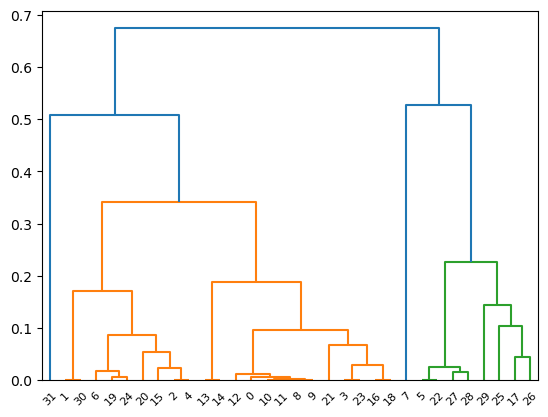

In [56]:
avc_link = linkage(Car_Types[['Min_Distance']].fillna(0), method='average')
dend = dendrogram(avc_link)

In [58]:
clusters = fcluster(avc_link, 3, criterion="maxclust")
df3["clusters"] = clusters

df3["Car Name"] = df["name"]
df3.head()

,Car 1,Min_Distance,clusters,Car Model,Car Name
0,1,0.345555,1,Mini,Mazda RX4
1,2,0.576897,1,Mini,Mazda RX4 Wag
2,3,0.716444,1,Mini,Datsun 710
3,4,0.448726,1,Mini,Hornet 4 Drive
4,5,0.716444,1,Mini,Hornet Sportabout


In [62]:
# Create a DataFrame for each Car and type of car

Final_data = {
    "Car Name" : df3["Car Name"],
    "Car ID" : df3["Car 1"],
    "Car Type" : Car_Types["Car_Type 1"]
                            }
F_Data = pd.DataFrame(Final_data)
F_Data.tail()

,Car Name,Car ID,Car Type
27,Lotus Europa,28,Mini
28,Ford Pantera L,29,Mini
29,Ferrari Dino,30,Prime
30,Maserati Bora,31,Mini
31,Volvo 142E,32,None


In [63]:
freq_table=pd.crosstab(F_Data['Car Type'],'count')
freq_table

col_0,count
Car Type,
Mini,12
Prime,10
Sedan,9
